In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
from random import randrange
from PIL import Image
import os
import random
from sklearn.decomposition import TruncatedSVD #importing just to do truncatedSVD for me, I didn't have the time(and energy :) ) to implement by myself.

In [2]:
##k-Cross_validation_split:
def cross_validation_split(dataset,k):
    k_folds = list()
    copy_data = list(dataset)
    fold_size = int(len(dataset)/k)
    
    for i in range(k):
        fold = list()
        for j in range(fold_size):
            fold.append(copy_data.pop(randrange(len(copy_data))))
        k_folds.append(fold)
    return k_folds  

In [3]:
data = pd.read_csv('health_data.csv')
data.head()

,age,restbps,chol,category
0,26,109,243,0
1,27,106,156,0
2,28,107,225,0
3,27,105,277,0
4,30,96,221,0


In [4]:
X = data.to_numpy()[:, :]
Y = data.to_numpy()[:, 3]
split = 0.8 #using 70:30 split, random each time
train_samples = np.random.choice(X.shape[0], int(split*X.shape[0]))
test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

X_train = X[[train_samples]]
Y_train = Y[[train_samples]]

X_test = X[[test_samples]]
Y_test = Y[[test_samples]]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  

In [4]:
print(X_test.shape[0])
print(X_train.shape[0])

314
560


In [12]:
no_of_classes = 2;

In [5]:
def euclidean_distance(X_1, X_2):
    distance_square = np.sum(np.square(X_1 - X_2), axis = 0, keepdims =True)
    
    return math.sqrt(distance_square)

In [6]:
# Locate the most similar k neighbors
def get_neighbors(X_train, X, k):
    distances = list()
    for X_i in X_train:
        dist = euclidean_distance(X, X_i)
        distances.append((X_i, dist))
    distances.sort(key=lambda tup: tup[1])
    k_neighbors = list()
    for i in range(k):
        k_neighbors.append(distances[i][0])
    return k_neighbors

In [7]:
def predict_classification(X_train, X, k):
    k_neighbors = get_neighbors(X_train, X, k)
    output_values = [row[-1] for row in k_neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [8]:
def predict_regression(X_train, X, k):
    k_neighbors = get_neighbors(X_train, X, k)
    output_values = [row[-1] for row in k_neighbors]
    prediction = sum(output_values) / float(len(output_values))
    return prediction

In [13]:
#computing accuracy on test data.
C = np.zeros((no_of_classes,no_of_classes)) #[[]]
for i in range((X_test.shape[0])):
    y_pred = predict_classification(X_train, X_test[i], 4)
    C[y_pred, Y_test[i]] += 1

In [14]:
C

array([[167.,  46.],
       [ 12.,  89.]])

In [15]:
acc = (C[0,0] + C[1,1])/np.sum(C)
print(acc)

0.8152866242038217


In [16]:
precision = (C[1,1])/(C[1,0] + C[1,1])
precision

0.8811881188118812

In [17]:
Recall = (C[1,1])/(C[0,1] + C[1,1])
Recall

0.6592592592592592

In [18]:
from tqdm import tqdm
Precision = []
Recall = []
ACC = []
F1_score = []
ACC_tr = []
kk = range(1,300)
for k in tqdm(range(1,300)):
    C = np.zeros((2,2)) #[[]]
    for i in range((X_test.shape[0])):
        y_pred = predict_classification(X_train, X_test[i], k)
        C[y_pred, Y_test[i]] += 1
    acc = (C[0,0] + C[1,1])/np.sum(C) 
    pr = C[1,1]/(C[1,1] + C[1,0])
    rec = C[1,1]/(C[1,1] + C[0,1])
    f1 = 2*(pr*rec)/(pr + rec)
    Precision.append(pr)
    Recall.append(rec)
    F1_score.append(f1)
    ACC.append(acc)
    
    C1 = np.zeros((2,2))
    for i in range((X_train.shape[0])):
        y_pred1 = predict_classification(X_train, X_train[i], k)
        C1[y_pred1, Y_train[i]] += 1
    acc1 = (C1[0,0] + C1[1,1])/np.sum(C1)
    ACC_tr.append(acc1)
#plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curve');

100%|██████████| 299/299 [15:43<00:00,  3.15s/it]


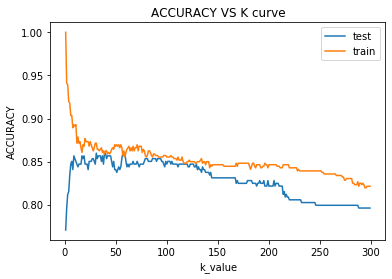

In [19]:
plt.plot(kk[:], ACC[:], '-')
plt.plot(kk[:], ACC_tr[:], '-')
plt.legend(["test", "train"])
plt.xlabel('k_value'); plt.ylabel('ACCURACY'); plt.title('ACCURACY VS K curve');


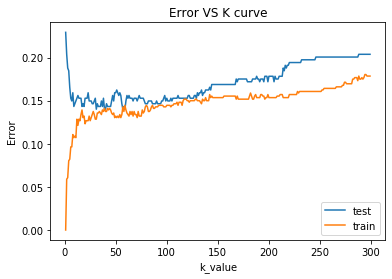

In [24]:
plt.plot(kk[:],np.ones(299) - ACC[:], '-')
plt.plot(kk[:],np.ones(299)- ACC_tr[:], '-')
plt.legend(["test", "train"])
plt.xlabel('k_value'); plt.ylabel('Error'); plt.title('Error VS K curve');


In [ ]:
plt.plot(kk[:50], Recall[:50], '-')
plt.xlabel('k_value'); plt.ylabel('RECALL'); plt.title('RECALL VS K curve');

In [ ]:
plt.plot(kk[:50], Precision[:50], '-')
plt.xlabel('k_value'); plt.ylabel('PRECISION'); plt.title('PRECISION VS K curve');

In [ ]:
plt.plot(kk[:50], F1_score[:50], '-')
plt.xlabel('k_value'); plt.ylabel('F1_SCORE'); plt.title('F1_SCORE VS K curve');

## Question2

In [9]:
df = pd.read_excel('weather_data.xlsx')
df.head()

,dewptc,hum,wndspd,pressure,rain,smoke,temp
0,28,59,20,1008,0,0,20
1,48,61,10,1012,1,0,21
2,24,53,3,1001,0,0,16
3,17,54,8,1002,0,0,16
4,27,51,5,1007,0,0,14


In [10]:
X_2 = df.to_numpy()[:, :]
Y_2 = df.to_numpy()[:, 6]
split = 0.8 #using 70:30 split, random each time
train_samples = np.random.choice(X_2.shape[0], int(split*X_2.shape[0]))
test_samples = np.array([i for i in range(X_2.shape[0]) if i not in list(train_samples)])

X_train_2 = X_2[[train_samples]]

X_test_2 = X_2[[test_samples]]
Y_test_2 = Y_2[[test_samples]]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error

In [25]:
y_predict = []
for i in range((X_test_2.shape[0])):
    y_pred = predict_regression(X_train_2, X_test_2[i], 4)
    y_predict.append(y_pred)

In [12]:
y_predict

[22.0,
 17.5,
 12.75,
 23.5,
 15.25,
 11.5,
 16.5,
 14.75,
 6.75,
 8.5,
 17.5,
 24.75,
 34.75,
 30.5,
 13.75,
 26.0,
 16.5,
 12.5,
 20.0,
 6.0,
 12.5,
 8.0,
 0.25,
 25.5,
 20.0,
 9.0,
 22.5,
 14.0,
 22.5,
 11.25,
 13.5,
 26.75,
 16.5,
 2.0,
 27.75,
 13.5,
 20.5,
 11.25,
 4.5,
 7.0,
 20.75,
 5.0,
 16.5,
 15.0,
 13.25,
 4.5,
 7.5,
 6.25,
 11.75,
 24.5,
 20.25,
 7.0,
 11.25,
 12.75,
 15.0,
 12.75,
 13.25,
 11.0,
 9.0,
 31.5,
 14.25,
 16.0,
 23.0,
 20.0,
 11.0,
 17.25,
 20.0,
 9.25,
 28.5,
 10.0,
 8.0,
 6.0,
 38.75,
 28.25,
 9.5,
 14.25,
 14.0,
 5.25,
 20.5,
 20.5,
 9.25,
 6.75,
 12.5,
 14.25,
 20.25,
 11.0,
 14.25,
 4.0,
 18.0,
 26.75,
 2.0,
 32.25,
 19.25,
 31.0,
 10.75,
 3.75,
 36.5,
 20.25,
 22.75,
 11.5,
 9.25,
 14.75,
 20.0,
 10.0,
 7.5,
 18.5,
 6.0,
 16.0,
 12.25,
 26.75,
 11.75,
 12.0,
 12.75,
 10.75,
 17.5,
 17.0,
 7.0,
 36.25,
 6.5,
 16.0,
 6.25,
 16.75,
 12.75,
 16.75,
 12.25,
 17.0,
 10.25,
 23.75,
 7.0,
 23.5,
 6.5,
 9.25,
 32.5,
 7.0,
 6.25,
 1.75,
 5.5,
 34.0,
 8.5,
 8.0,
 2

In [13]:
error = Y_test_2 - y_predict

In [14]:
error =np.square(np.array(error))

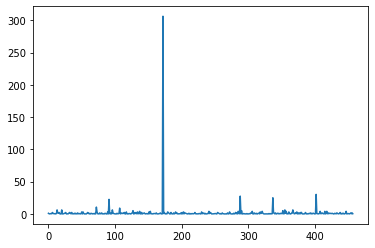

In [15]:
plt.plot(error)

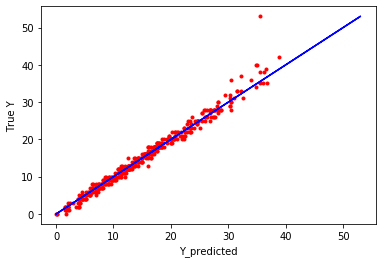

In [28]:
plt.plot(y_predict, Y_test_2 , 'r.')
plt.plot(Y_test_2, Y_test_2, 'b')
plt.xlabel('Y_predicted'); plt.ylabel('True Y'); 

In [19]:
from tqdm import tqdm
loss = []

for k in tqdm(range(1,300)):
    y_predict = []
    for i in range((X_test_2.shape[0])):
        y_pred = predict_regression(X_train_2, X_test_2[i], k)
        y_predict.append(y_pred)
    error = Y_test_2 - y_predict
    error =np.square(np.array(error))
    loss.append(np.mean(error))

100%|██████████| 299/299 [10:49<00:00,  2.17s/it]


In [21]:
kk = range(1,300)

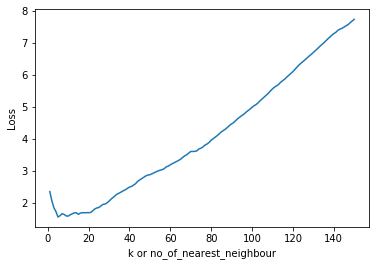

In [24]:
plt.plot(kk[:150], loss[:150])
plt.xlabel('k or no_of_nearest_neighbour'); plt.ylabel('Loss'); 

In [ ]:
loss[0:30]

# Question 3

In [7]:
import os
IMAGE_PATH = './Medical_MNIST'
print(os.path.abspath(IMAGE_PATH))
n_components = 20

C:\Users\rockt\Assignment1_git\ELL409_Assignment1\Medical_MNIST


In [8]:
#data_loader
#!DEL *.npz
from tqdm import tqdm
split = 0.7 #using 70:30 split, random each time
def data_loader():
    X = []
    Y = []
    X_test = []
    Y_test = []
    
    i = 0
    for folder in os.listdir(os.path.abspath(IMAGE_PATH)):
        IMAGE_DIR = os.path.join(IMAGE_PATH, folder)
        print("Reading" + IMAGE_DIR)
        files = os.listdir(IMAGE_DIR)
        random.shuffle(files)
        j=0
        for file in tqdm(files):
            if j < int(len(files)*split):
                X.append((np.asarray(Image.open(os.path.join(IMAGE_DIR, file)))).reshape(-1))
                Y.append(i)
            else:
                X_test.append((np.asarray(Image.open(os.path.join(IMAGE_DIR, file)))).reshape(-1))
                Y_test.append(i)
            j += 1
        
        i += 1
    print('Completed Loading Data. Saving as np file so that can directy load array nexttime')
    np.savez('q3data.npz', X = np.array(X), Y = np.array(Y), X_test=X_test, Y_test = Y_test)
    return np.array(X), np.array(Y), np.array(X_test), np.array(Y_test)

if 'q3data.npz' in os.listdir('./'):
    zfile = np.load('q3data.npz')
    X = zfile['X']
    Y = zfile['Y']
    X_test = zfile['X_test']
    Y_test = zfile['Y_test']
else:
    X, Y, X_test, Y_test = data_loader()

In [9]:
print(f'X.shape = {X.shape}') #oof!
print(f'X_test.shape = {X_test.shape}')

X.shape = (41267, 4096)
X_test.shape = (17687, 4096)


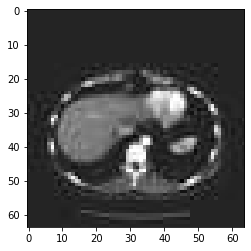

In [10]:
#Visualizing the images.
plt.imshow(X[0].reshape(64, -1), cmap='gray')

In [11]:
#Lets try to do PCA on the input images??
h, w = 64, 64
'''
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data
    #credits to https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184 for helping me write PCA
    #and saving me a few hours.
'''
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
'''
n_components = 50
P, C, M, X_centered=pca(X[:1000], n_pc=n_components)
#P->lower dimensional version of X, C-> Eigen vectors with largest eigen values, M->mean image (used in reconstruction)
eigenscans = C.reshape((n_components, h, w))
eigenscan_titles = ["eigenscan %d" % i for i in range(eigenscans.shape[0])]
plot_portraits(eigenscans, eigenscan_titles, h, w, 4, 4) 
'''

'\nn_components = 50\nP, C, M, X_centered=pca(X[:1000], n_pc=n_components)\n#P->lower dimensional version of X, C-> Eigen vectors with largest eigen values, M->mean image (used in reconstruction)\neigenscans = C.reshape((n_components, h, w))\neigenscan_titles = ["eigenscan %d" % i for i in range(eigenscans.shape[0])]\nplot_portraits(eigenscans, eigenscan_titles, h, w, 4, 4) \n'

In [12]:
X_samples = list()
Y_samples = list()
X_samples.append(list(X))
Y_samples.append(list(Y))
X_samples.append(list(X_test))
Y_samples.append(list(Y_test))
X_samples = sum(X_samples, [])
Y_samples = sum(Y_samples, [])
X_samples = np.array(X_samples)
Y_samples = np.array(Y_samples)

In [13]:
def fastpca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    svd = TruncatedSVD(n_components=n_pc, n_iter=7, random_state=42)
    svd.fit(X)
    #U, S, V = np.linalg.svd(centered_data)
    components = svd.components_
    #projected = U[:,:n_pc]*S[:n_pc]
    projected = svd.transform(X)
    return projected, components, mean, centered_data

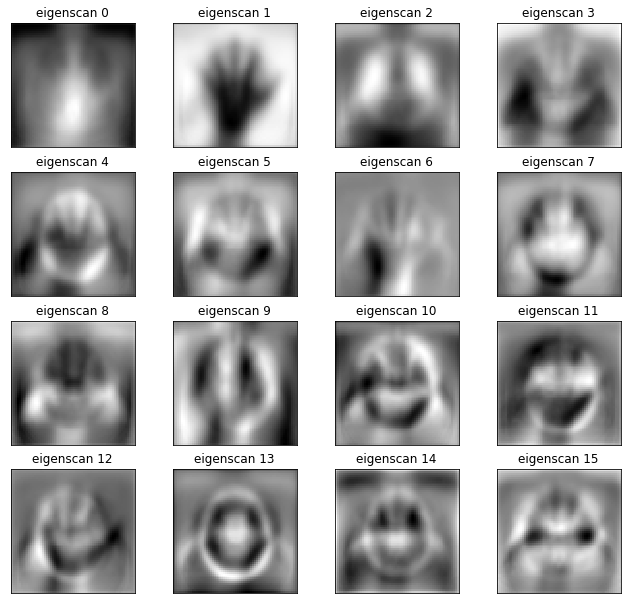

In [14]:
X_red, C, M, X_centered=fastpca(X_samples, n_pc=n_components)
#X_red->lower dimensional version of X, C-> Eigen vectors with largest eigen values, M->mean image (used in reconstruction)
eigenscans = C.reshape((n_components, h, w))
eigenscan_titles = ["eigenscan %d" % i for i in range(eigenscans.shape[0])]
plot_portraits(eigenscans, eigenscan_titles, h, w, 4, 4) 

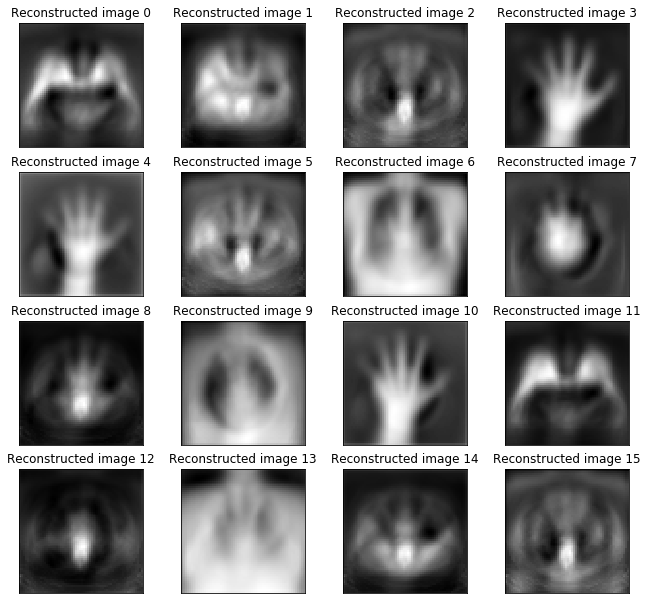

In [15]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
arr = np.random.choice(X.shape[0], 16)
recovered_images=[reconstruction(X_centered, C, M, h, w, i) for i in arr]
plot_portraits(recovered_images, [f"Reconstructed image {i}" for i in range(len(recovered_images))], h, w, n_row=4, n_col=4)

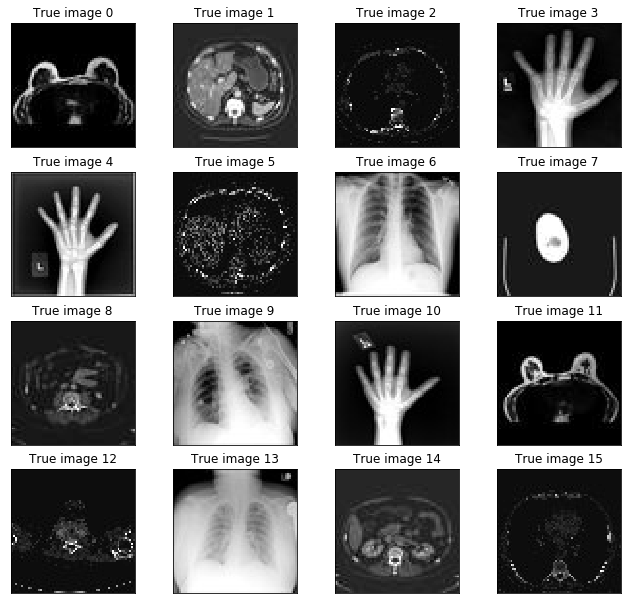

In [16]:
true_images = [X[i].reshape(h, w) for i in arr]
plot_portraits(true_images, [f"True image {i}" for i in range(len(recovered_images))], h, w, n_row=4, n_col=4)

In [17]:
Y_samples = Y_samples.reshape((58954,1))

In [18]:
X_final = np.append(X_red, Y_samples, axis = 1)
X_final.shape

(58954, 21)

In [19]:
no_of_classes = 6

In [20]:
def prior_multi_class(X, no_of_classes):
    P = []
    for i in range(no_of_classes):
        X_i = X[X ==i]
        P.append(float(X_i.shape[0]/X.shape[0]))
    return P

In [21]:
def separate(X, no_of_classes):
    data = dict()
    for i in range(no_of_classes):
        data["X_"+str(i)] = X[X[:,20] == i]
    return data

In [22]:
Y = X_final[:,20].reshape(X_final.shape[0])
Prior = prior_multi_class((Y), no_of_classes)
Prior

[0.16962377446822946,
 0.15188112765885267,
 0.16962377446822946,
 0.16962377446822946,
 0.16962377446822946,
 0.16962377446822946]

In [23]:
from tqdm import tqdm
def k_fold_evaluation_multi_class(dataset, no_of_folds, no_of_classes, no_of_features,prior):
    k_folds = cross_validation_split(dataset, no_of_folds)
    accuracy_list = []
    TP_rate_list = []
    FP_rate_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []
    ind = 0
    for fold in k_folds:
        
        X_train = list(k_folds)
        #print(ind)
        del X_train[ind]
        ind=ind+1
        X_train = sum(X_train, [])
        X_train = np.array(X_train)
        data_train = separate(X_train, no_of_classes)
        fold = np.array(fold)
        data_test = separate(fold, no_of_classes)
        Y = X_train[:,20].reshape(X_train.shape[0])
        P = prior_multi_class((Y), no_of_classes)
        C = np.zeros((no_of_classes,no_of_classes))
        for cc in tqdm(range(no_of_classes)):
            X_test = data_test["X_"+str(cc)]
            for i in tqdm(range((X_test.shape[0]))):
                y_pred = predict_classification(X_train, X_test[i], 10)
                #print(y_pred)
                C[int(y_pred), cc] += 1
        if ind == 1:
            print(C)
            print("no_of_elements" + str(np.sum(C)))
        acc = (C[0,0] + C[1,1]+ C[2,2]+ C[3,3]+ C[4,4]+ C[5,5])/np.sum(C) 
        #pr = C[1,1]/(C[1,1] + C[1,0])
        #rec = C[1,1]/(C[1,1] + C[0,1])
        #f1 = 2*(pr*rec)/(pr + rec)
        accuracy_list.append(acc)
        #precision_list.append(pr)
        #recall_list.append(rec)
        #f1_score_list.append(f1)
    return np.array(accuracy_list), np.mean(np.array(TP_rate_list)), np.mean(np.array(FP_rate_list)), np.mean(np.array(precision_list)), np.mean(np.array(recall_list)), np.mean(np.array(f1_score_list)) 
    

In [24]:
accuracy_list, TP_rate_list, FP_rate_list, precision_list, recall_list, f1_score_list = k_fold_evaluation_multi_class(X_final, 10,6,20,Prior)
print(accuracy_list)
print(np.mean(accuracy_list))

 30%|██▉       | 303/1016 [01:41<03:58,  2.99it/s]


 60%|█████▉    | 605/1016 [03:25<02:24,  2.84it/s]


 89%|████████▉ | 907/1016 [05:13<00:35,  3.07it/s]


 22%|██▏       | 197/903 [01:11<04:37,  2.54it/s]


 56%|█████▌    | 505/903 [02:57<02:18,  2.88it/s]


 90%|█████████ | 813/903 [04:45<00:31,  2.87it/s]


 21%|██▏       | 215/1004 [01:19<04:45,  2.77it/s]


 51%|█████▏    | 517/1004 [03:07<02:43,  2.98it/s]


 82%|████████▏ | 819/1004 [04:58<01:36,  1.92it/s]


 11%|█▏        | 117/1022 [00:52<05:27,  2.76it/s]


 41%|████      | 419/1022 [02:34<03:54,  2.57it/s]


 71%|███████   | 721/1022 [04:34<02:15,  2.22it/s]


 67%|██████▋   | 4/6 [24:06<12:10, 365.46s/it]


 31%|███▏      | 309/987 [02:09<07:06,  1.59it/s]


 63%|██████▎   | 617/987 [04:14<02:17,  2.68it/s]


 94%|█████████▎| 925/987 [06:13<00:20,  3.01it/s]


 26%|██▌       | 246/963 [01:24<03:58,  3.00it/s]


 58%|█████▊    | 554/963 [03:15<02:24,  2.84it/s]


 90%|████████▉ | 862/963 [05:15<00:32,  3.07it/s]


  0%|          | 0/1053 [00:00<?, ?it/s]

[[1.016e+03 0.000e+00 0.000e+00 0.000e+00 5.000e+00 0.000e+00]
 [0.000e+00 9.030e+02 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.004e+03 1.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.017e+03 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 4.000e+00 9.740e+02 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.000e+00 9.630e+02]]
no_of_elements5895.0



 29%|██▉       | 304/1053 [01:46<04:08,  3.01it/s]


 58%|█████▊    | 606/1053 [03:30<02:41,  2.76it/s]


 86%|████████▌ | 908/1053 [10:35<04:58,  2.06s/it]


 17%|█▋        | 160/929 [04:45<16:47,  1.31s/it]


 50%|█████     | 468/929 [14:31<13:53,  1.81s/it]


 54%|█████▎    | 499/929 [15:20<11:50,  1.65s/it]

KeyboardInterrupt: 

In [3]:
Conff = np.array([[1.016e+03, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00],
 [0.000e+00, 9.030e+02, 0.000e+00 ,0.000e+00, 1.000e+00, 0.000e+00],
 [0.000e+00, 0.000e+00, 1.004e+03, 1.000e+00, 1.000e+00, 0.000e+00],
 [0.000e+00, 0.000e+00, 0.000e+00, 1.017e+03, 0.000e+00, 0.000e+00],
 [0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 9.740e+02, 0.000e+00],
 [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 9.630e+02]])

In [4]:
conf = Conff
conf_ = Conff.T
n_classes = 6

In [7]:
diag = np.arange(n_classes)
acc = np.sum(conf[diag, diag])/np.sum(conf)*100

print('Accuracy = {:0.2f}'.format(acc))

#per class precision, recall
P = []
R = []
F = []
for i in range(n_classes):
    P.append(conf_[i,i]/np.sum(conf_[i,:]))
    R.append(conf_[i,i]/np.sum(conf_[:,i]))
    F.append(2*P[i]*R[i]/(P[i] + R[i]))
    print('{}: p = {:0.3f}, r = {:0.3f}, f = {:0.3f}'.format(classes[i], P[i]*100, R[i]*100, F[i]*100))
macro_f = sum(F)/len(F)
print('Macro-F1 score = {:0.3f}'.format(macro_f*100))

Accuracy = 99.69
AbdCT: p = 100.000, r = 99.510, f = 99.755
BreastMRI: p = 100.000, r = 99.889, f = 99.945
ChestCT: p = 100.000, r = 99.801, f = 99.900
CXR: p = 99.511, r = 100.000, f = 99.755
Hand: p = 98.683, r = 99.591, f = 99.135
Head: p = 100.000, r = 99.381, f = 99.689
Macro-F1 score = 99.696


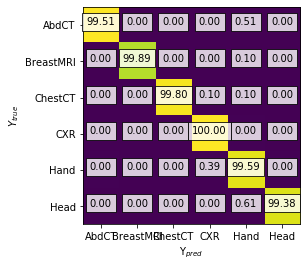

In [6]:
plt.imshow(conf.T/np.sum(conf))
classes = ['AbdCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'Head']
plt.ylabel('$Y_{true}$')
plt.xlabel('Y$_{pred}$')
plt.xticks(np.arange(n_classes), classes)
plt.yticks(np.arange(n_classes), classes)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        plt.text(j, i, "{:0.2f}".format(float((conf[i][j]/np.sum(conf[j]))*100)), horizontalalignment='center', bbox = dict(facecolor='white',alpha=0.8))